In [53]:
# !pip install scanpy -q
# !pip install anndata -q


Primary Libraries - 

- **Scanpy** = Open-source Python library for single-cell RNA sequencing (scRNA-seq) analysis. It provides a comprehensive toolkit for quality control, visualization, preprocessing, clustering, differential expression analysis, trajectory inference

- **Anndata** = Provides a flexible and efficient way to store, manipulate, and analyze scRNA-seq data

### Importing other libraries

In [54]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Reading in the data

In [55]:
sp_data_folder = '/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048'
sp_data_folder



'/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048'

In [56]:
adata = sc.read_visium(sp_data_folder, count_file='/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048/filtered_feature_bc_matrix.h5', load_images=True)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [57]:
adata.var_names_make_unique()

In [58]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In this data set we see 2987 cells (n_obs) and 31053 genes (n_vars).

**n_obs** = refers to the number of observations or cells in the AnnData object(2987).


**n_vars** = refers to the number of variables or features in the AnnData object(31053).  In the context of scRNA-seq data, these variables typically represent genes.

**obs** = refers to the observation or cell-level metadata associated with each individual cell in the dataset. Represents the annotations or attributes specific to each cell.

In [59]:
adata.obs.head() #First column represents the barcode associated with each cell

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGAGCGACTCCT-1,1,14,94
AAACAGCTTTCAGAAG-1,1,43,9
AAACAGGGTCTATATT-1,1,47,13


In [60]:
adata.var.head() # Gene representation

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mm10-3.0.0_premrna
Gm1992,ENSMUSG00000089699,Gene Expression,mm10-3.0.0_premrna
Gm37381,ENSMUSG00000102343,Gene Expression,mm10-3.0.0_premrna
Rp1,ENSMUSG00000025900,Gene Expression,mm10-3.0.0_premrna
Sox17,ENSMUSG00000025902,Gene Expression,mm10-3.0.0_premrna


### Checking for the highest expressed genes!

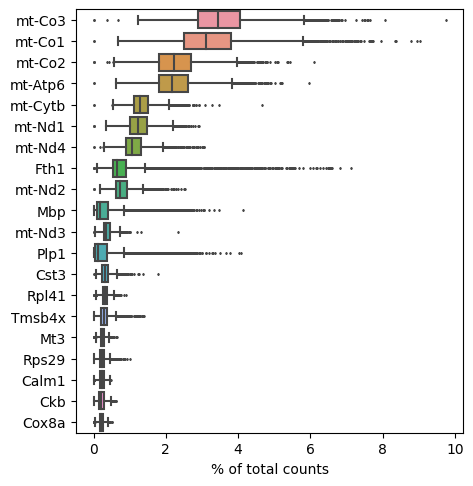

In [61]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [62]:
#Convert the sparse matrix into a dense matrix
dense_matrix= adata.X.toarray()

print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
cell_index = 0

#Access the gene expression for a specific cell
gene_expression = adata.X[cell_index]

#Get the non-zero expression attributed to that gene index
expressed_gene_indices = gene_expression.nonzero()[1]

#Get the gene name from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

print(expressed_genes)

Index(['AC149090.1', 'mt-Cytb', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd3',
       'mt-Co3', 'mt-Atp6', 'mt-Atp8', 'mt-Co2',
       ...
       'Ncoa2', 'A830018L16Rik', 'Cops5', 'Snhg6', '1700034P13Rik', 'Vcpip1',
       'Adhfe1', 'Sntg1', 'Atp6v1h', 'Xkr4'],
      dtype='object', length=4678)


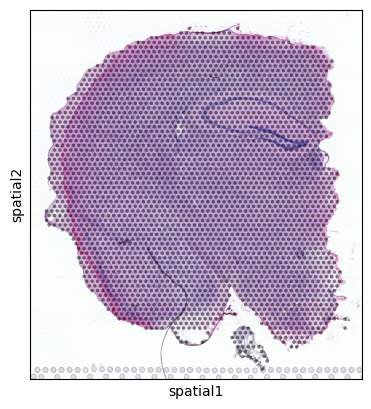

In [64]:
sc.pl.spatial(adata, img_key='hires', alpha=0.5)

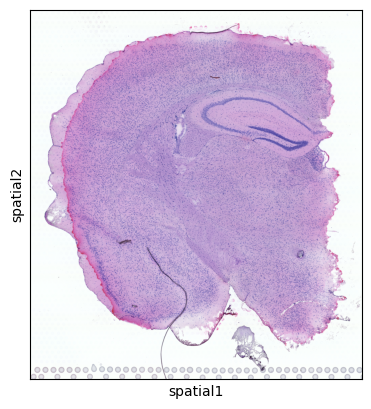

In [65]:
sc.pl.spatial(adata, img_key='hires', color=None) #Image with no overlay

In [66]:
gene_names = adata.var.index

print('IS Rorb gene present in the vars', 'Rorb' in gene_names)
print("Is Vip gene present in the vars?", "Vip" in gene_names)


IS Rorb gene present in the vars True
Is Vip gene present in the vars? True


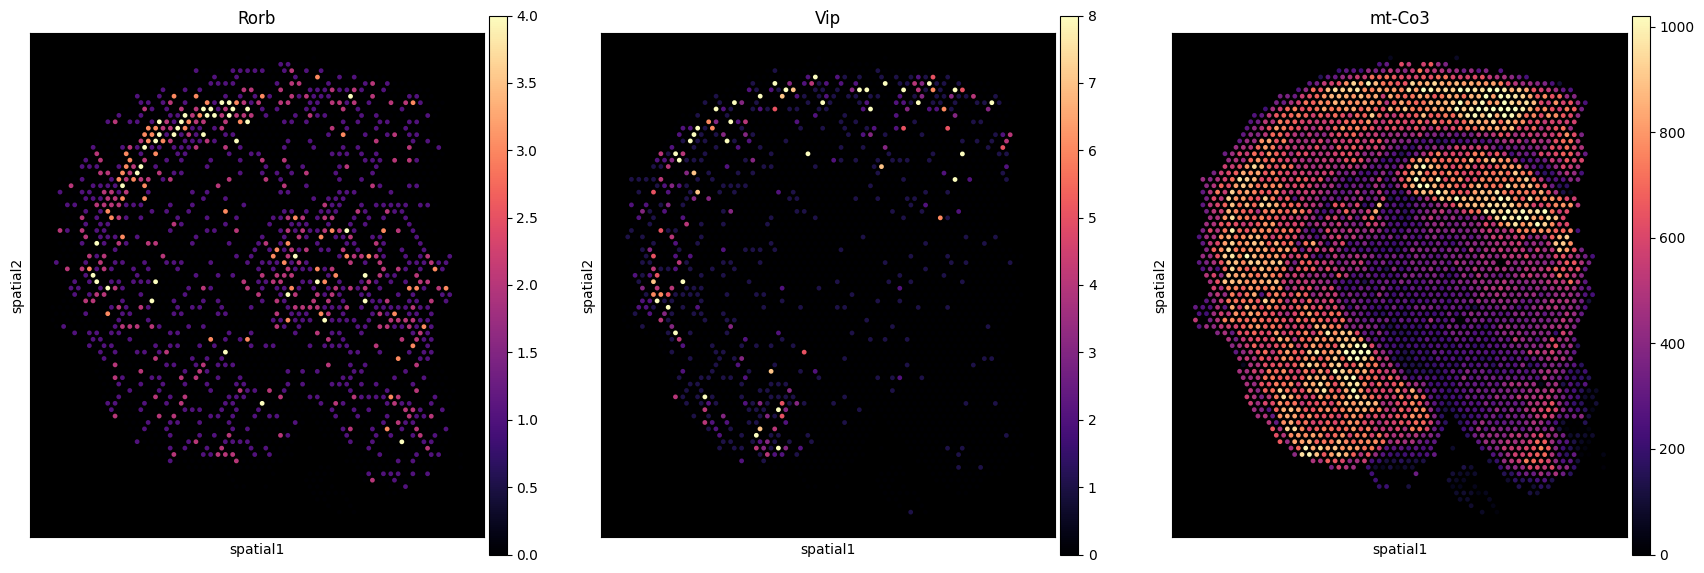

In [67]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
    sc.pl.spatial(adata, color=["Rorb", "Vip", "mt-Co3"], img_key=None, size=1,
                  vmin = 0, cmap = 'magma', vmax = 'p99.0',
                  gene_symbols = 'SYMBOL')


In [68]:
adata.var[adata.var.index.str.startswith('mt-')]


,gene_ids,feature_types,genome
mt-Nd1,ENSMUSG00000064341,Gene Expression,mm10-3.0.0_premrna
mt-Nd2,ENSMUSG00000064345,Gene Expression,mm10-3.0.0_premrna
mt-Co1,ENSMUSG00000064351,Gene Expression,mm10-3.0.0_premrna
mt-Co2,ENSMUSG00000064354,Gene Expression,mm10-3.0.0_premrna
mt-Atp8,ENSMUSG00000064356,Gene Expression,mm10-3.0.0_premrna
mt-Atp6,ENSMUSG00000064357,Gene Expression,mm10-3.0.0_premrna
mt-Co3,ENSMUSG00000064358,Gene Expression,mm10-3.0.0_premrna
mt-Nd3,ENSMUSG00000064360,Gene Expression,mm10-3.0.0_premrna
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10-3.0.0_premrna
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10-3.0.0_premrna


In [69]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')

In [70]:
adata.var['mt'].value_counts()

mt
False    31040
True        13
Name: count, dtype: int64

In [71]:
ribo_genes = pd.read_csv('/Users/karandeepsinghnanda/Documents/VSCode/RNASeq-Analysis/KEGG_RIBOSOME.v2023.2.Hs.csv', skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [72]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var


,gene_ids,feature_types,genome,mt,ribo
Xkr4,ENSMUSG00000051951,Gene Expression,mm10-3.0.0_premrna,False,False
Gm1992,ENSMUSG00000089699,Gene Expression,mm10-3.0.0_premrna,False,False
Gm37381,ENSMUSG00000102343,Gene Expression,mm10-3.0.0_premrna,False,False
Rp1,ENSMUSG00000025900,Gene Expression,mm10-3.0.0_premrna,False,False
Sox17,ENSMUSG00000025902,Gene Expression,mm10-3.0.0_premrna,False,False
...,...,...,...,...,...
AC168977.1,ENSMUSG00000079808,Gene Expression,mm10-3.0.0_premrna,False,False
AC149090.1,ENSMUSG00000095041,Gene Expression,mm10-3.0.0_premrna,False,False
CAAA01118383.1,ENSMUSG00000063897,Gene Expression,mm10-3.0.0_premrna,False,False
Vmn2r122,ENSMUSG00000096730,Gene Expression,mm10-3.0.0_premrna,False,False


In [73]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo'
    uns: 'spatial'
    obsm: 'spatial'

In [76]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", 'ribo'], inplace=True)



In [77]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [85]:
number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)


Number of spots under tissue: 2987
Mean reads per spot: 15484.307
Median genes per spot: 4553.0


In [87]:
adata.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
AAACAAGTATCTCCCA-1,1,50,102,4678,8.450840,14284.0,9.566965,27.457295,32.812938,39.897788,52.856343,2847.0,7.954372,19.931393,0.0,0.0,0.0
AAACACCAATAACTGC-1,1,59,19,3549,8.174703,9951.0,9.205529,37.061602,42.337454,49.110642,60.586876,2764.0,7.924796,27.776104,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1,14,94,6779,8.821732,32155.0,10.378354,23.784792,29.830508,37.860364,51.397916,4866.0,8.490233,15.132950,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,1,43,9,3108,8.042056,7935.0,8.979165,32.917454,39.054820,46.389414,59.206049,1906.0,7.553287,24.020164,0.0,0.0,0.0
AAACAGGGTCTATATT-1,1,47,13,4515,8.415382,14483.0,9.580800,30.994960,36.415107,43.506180,56.031209,3190.0,8.068089,22.025824,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTGTGCTAC-1,1,24,64,8457,9.042868,65866.0,11.095393,17.673762,24.381320,33.152157,48.190265,3352.0,8.117611,5.089120,0.0,0.0,0.0
TTGTTGTGTGTCAAGA-1,1,31,77,3464,8.150468,8785.0,9.080914,27.137166,33.249858,41.343199,55.310188,1586.0,7.369601,18.053501,0.0,0.0,0.0
TTGTTTCACATCCAGG-1,1,58,42,5457,8.604838,19956.0,9.901335,23.872520,29.695330,37.748046,51.638605,2988.0,8.002694,14.972940,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,1,60,30,5300,8.575651,18351.0,9.817493,24.892376,30.477903,38.194104,51.670209,3122.0,8.046550,17.012697,0.0,0.0,0.0


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

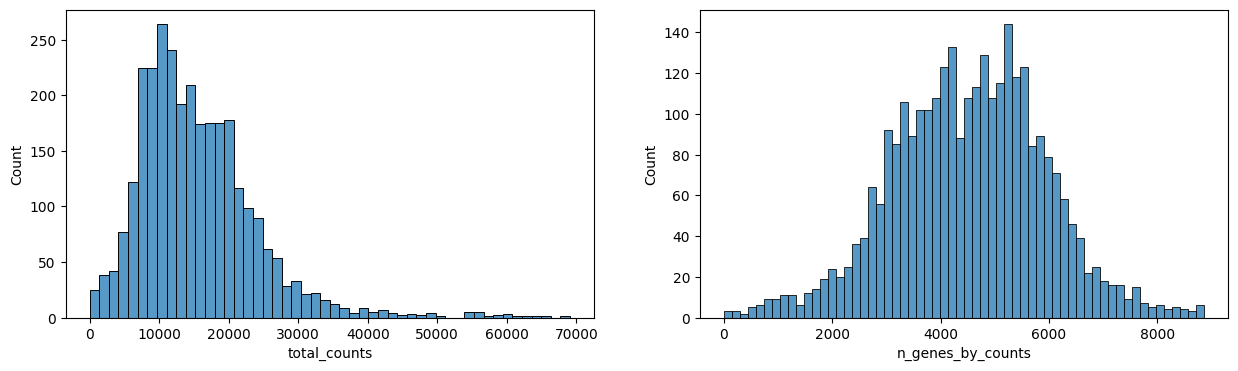

In [89]:
fig , axs = plt.subplots(1,2, figsize = (15,4))
sns.histplot(adata.obs['total_counts'], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


In [90]:
adata.obs.sort_values('total_counts')

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
CACAGTCCCGCTTCGC-1,1,60,112,3,1.386294,3.0,1.386294,100.000000,100.000000,100.000000,100.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
AGCGATGCGCCTAATA-1,1,64,108,38,3.663562,43.0,3.784190,100.000000,100.000000,100.000000,100.000000,5.0,1.791759,11.627908,0.0,0.0,0.0
AGATACCAATAGAACC-1,1,64,110,66,4.204693,73.0,4.304065,78.082192,100.000000,100.000000,100.000000,7.0,2.079442,9.589041,0.0,0.0,0.0
GGAGTTGATTCTGTGT-1,1,68,112,179,5.192957,226.0,5.424950,42.920354,65.044248,100.000000,100.000000,42.0,3.761200,18.584070,0.0,0.0,0.0
AGAAGAGCGCCGTTCC-1,1,38,88,238,5.476464,295.0,5.690360,36.271186,53.220339,87.118644,100.000000,55.0,4.025352,18.644068,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGACTGCGCAGCTCG-1,1,31,101,8821,9.085004,61512.0,11.027004,17.407985,23.345038,31.385746,45.608987,3956.0,8.283241,6.431265,0.0,0.0,0.0
TGGCCAAACTGAAGTA-1,1,28,76,8444,9.041330,62504.0,11.043002,19.035582,25.241585,33.629848,48.248112,5111.0,8.539346,8.177077,0.0,0.0,0.0
CTAACGAAACTTGCTG-1,1,30,94,8861,9.089528,63739.0,11.062568,17.661087,23.684087,31.945904,45.893409,4152.0,8.331586,6.514065,0.0,0.0,0.0
TTGTTCAGTGTGCTAC-1,1,24,64,8457,9.042868,65866.0,11.095393,17.673762,24.381320,33.152157,48.190265,3352.0,8.117611,5.089120,0.0,0.0,0.0


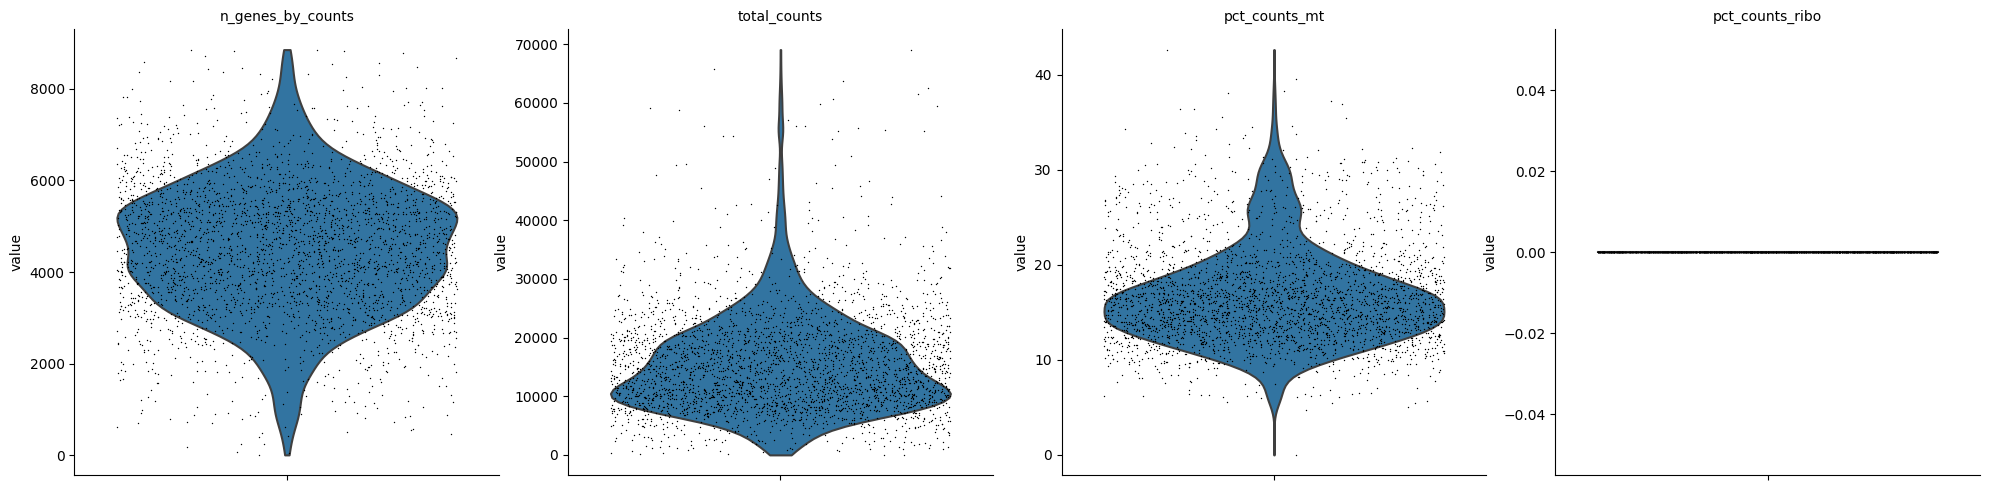

In [91]:

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [92]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]  
adata = adata[adata.obs["pct_counts_ribo"] < 2]

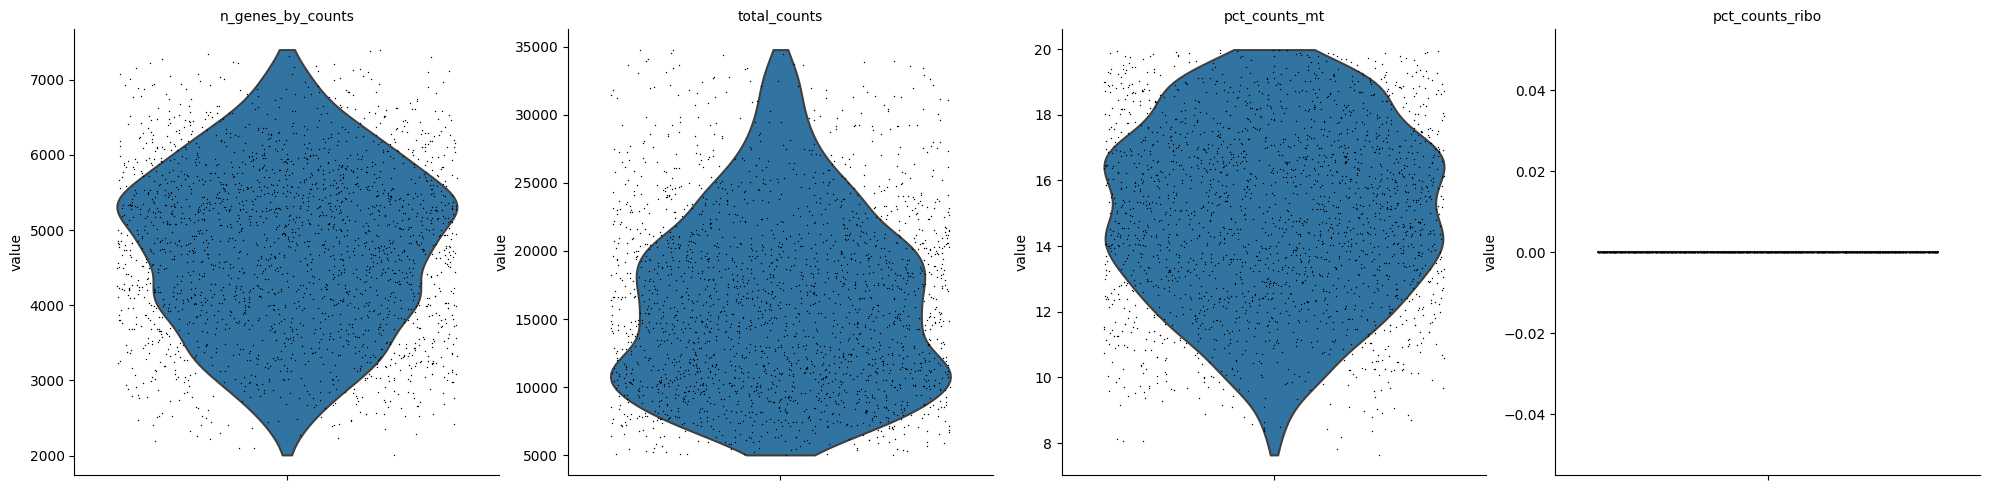

In [93]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)


### Normalize and log transformation